# <font color='green'>Homework 1</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Fall 2022<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from statistics import mean

# <span style="color:purple">Defining Variables</span>

In [2]:
global num_of_j_images
global num_of_s_images
num_of_j_images = 42
num_of_s_images = 40

labels = []
file_names = []
average_red_light = []
average_blue_light = []
average_green_light = []

# <span style="color:purple">Question 6</span>

In [3]:
for j in range(num_of_j_images):
    file_name = "\j%d.jpg" % (j+1)
    file_location = "Data\image" + file_name
    im = Image.open(file_location)
    pix = im.load()
    red_light = []
    blue_light = []
    green_light = []
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            pixcel = pix[x, y]
            red_light.append(pixcel[0])
            green_light.append(pixcel[1])
            blue_light.append(pixcel[2])
           
    labels.append('j')
    file_names.append(file_name)
    average_red_light.append(round(mean(red_light)))
    average_green_light.append(round(mean(green_light)))
    average_blue_light.append(round(mean(blue_light)))
    

In [4]:
for s in range(num_of_s_images):
    file_name = "\s%d.jpg" % (s+1)
    file_location = "Data\image" + file_name
    im = Image.open(file_location)
    pix = im.load()
    red_light = []
    blue_light = []
    green_light = []
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            pixcel = pix[x, y]
            red_light.append(pixcel[0])
            green_light.append(pixcel[1])
            blue_light.append(pixcel[2])
           
    labels.append('s')
    file_names.append(file_name)
    average_red_light.append(round(mean(red_light)))
    average_green_light.append(round(mean(green_light)))
    average_blue_light.append(round(mean(blue_light)))
    

In [5]:
raw_data = {'red': average_red_light,
            'green': average_green_light,
            'blue': average_red_light,
            'label': labels,
           }

df = pd.DataFrame(raw_data, index = file_names, columns = ['red', 'green', 'blue', 'label'])
print("head")
print(df.head(5))
print("\n\ntail")
print(df.tail(5))

head
         red  green  blue label
\j1.jpg   71     99    71     j
\j2.jpg   98    113    98     j
\j3.jpg   64     90    64     j
\j4.jpg   74     82    74     j
\j5.jpg   39     66    39     j


tail
          red  green  blue label
\s36.jpg   38     88    38     s
\s37.jpg  105    129   105     s
\s38.jpg   37    114    37     s
\s39.jpg   75    146    75     s
\s40.jpg   45    104    45     s


In [6]:
mask = np.random.rand(len(df)) < 0.7

train_red = (df['red'])[mask]
test_red = (df['red'])[~mask]

train_green = (df['green'])[mask]
test_green = (df['green'])[~mask]

train_blue = (df['blue'])[mask]
test_blue = (df['blue'])[~mask]

train_labels = (df['label'])[mask]
test_labels = (df['label'])[~mask]

In [7]:
np_train_red = np.array(train_red)
#np_test_red = np.array(test_red)

np_train_green = np.array(train_green)
#np_test_green = np.array(test_green)

np_train_blue = np.array(train_blue)
#np_test_blue = np.array(test_blue)

np_train_labels = np.array(train_labels)
#np_test_labels = np.array(test_labels)

mu_red_j = mean(np_train_red[np_train_labels=='j'])
mu_green_j = mean(np_train_green[np_train_labels=='j'])
mu_blue_j = mean(np_train_blue[np_train_labels=='j'])
                  
mu_red_s = mean(np_train_red[np_train_labels=='s'])
mu_green_s = mean(np_train_green[np_train_labels=='s'])
mu_blue_s = mean(np_train_blue[np_train_labels=='s'])              

x_j = np.vstack([np_train_red[np_train_labels=='j'], np_train_green[np_train_labels=='j'], np_train_blue[np_train_labels=='j']])
cov_j = np.cov(x_j)
cov_j[0][1] = 0
cov_j[0][2] = 0
cov_j[1][0] = 0
cov_j[1][2] = 0
cov_j[2][0] = 0
cov_j[2][1] = 0
print(cov_j)

x_s = np.vstack([np_train_red[np_train_labels=='s'], np_train_green[np_train_labels=='s'], np_train_blue[np_train_labels=='s']])
cov_s = np.cov(x_s)
cov_s[0][1] = 0
cov_s[0][2] = 0
cov_s[1][0] = 0
cov_s[1][2] = 0
cov_s[2][0] = 0
cov_s[2][1] = 0
print(cov_s)

[[1299.44    0.      0.  ]
 [   0.    707.29    0.  ]
 [   0.      0.   1299.44]]
[[1171.24333333    0.            0.        ]
 [   0.          945.26          0.        ]
 [   0.            0.         1171.24333333]]


In [8]:
from scipy.stats import multivariate_normal

likelihood_j = multivariate_normal(mean=[mu_red_j, mu_green_j, mu_blue_j], cov=cov_j)
likelihood_s = multivariate_normal(mean=[mu_red_s, mu_green_s, mu_blue_s], cov=cov_s)

predicted_labels = []

for index in range (len(test_labels)):
    lj = likelihood_j.pdf([test_red[index], test_green[index], test_blue[index]])
    ls = likelihood_s.pdf([test_red[index], test_green[index], test_blue[index]])
    if (lj >= ls):
        predicted_labels.append('j')
    else:
        predicted_labels.append('s')
        
print(predicted_labels)
print(test_labels)

['j', 'j', 'j', 's', 'j', 'j', 'j', 's', 'j', 'j', 's', 'j', 'j', 'j', 'j', 'j', 's', 's', 'j', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'j', 's', 'j']
\j3.jpg     j
\j5.jpg     j
\j10.jpg    j
\j12.jpg    j
\j14.jpg    j
\j15.jpg    j
\j17.jpg    j
\j19.jpg    j
\j20.jpg    j
\j22.jpg    j
\j27.jpg    j
\j32.jpg    j
\j33.jpg    j
\j34.jpg    j
\j38.jpg    j
\j40.jpg    j
\j41.jpg    j
\s4.jpg     s
\s6.jpg     s
\s8.jpg     s
\s9.jpg     s
\s16.jpg    s
\s18.jpg    s
\s20.jpg    s
\s26.jpg    s
\s28.jpg    s
\s29.jpg    s
\s32.jpg    s
\s34.jpg    s
\s36.jpg    s
\s37.jpg    s
\s38.jpg    s
Name: label, dtype: object


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(test_labels, predicted_labels)
tn, fp, fn, tp = confusion_matrix.ravel()

accuracy: 0.78125
precision: 0.75
recall: 0.8


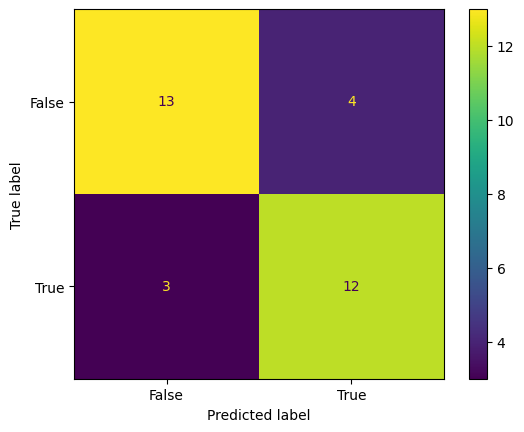

In [16]:
accuracy = sum(1 for x, y in zip(test_labels, predicted_labels) if x == y) / len(test_labels)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show() 